In [1]:
#Import statements for all of the packages referenced
import pandas as pd
import numpy as n
import matplotlib as mp
import seaborn as sns

In [2]:
#df_details: outputs labeled dataframe details. 
def df_details(df):
    print("Description of DataFrame: ")
    print(df.describe())
    print("DataFrame Head: ")
    print(df.head())
    print("DataFrame Columns: ")
    print(df.columns)

# Gathering Data
## CRISP-DM Step: Business Understanding 
### using the details of the dataset to determine a hypothesis for the data


In [3]:
#Import and build data frame with the data from the package
#Link to data : https://www.census.gov/econ/bfs/data/weekly.html
#Data Set :  Not Adjusted State Business Applications  
#Link to data dictionary: https://www.census.gov/econ/bfs/pdf/bfs_weekly_data_dictionary.pdf
rf = pd.read_csv("region_bfa.csv")
df = pd.DataFrame(rf)
df_details(df)

Description of DataFrame: 
              Year         Week      Fregion        BA_NSA       HBA_NSA  \
count  4048.000000  4048.000000  4048.000000   4048.000000   4048.000000   
mean   2015.209486    26.226285     2.500000  16591.474802   6603.670949   
std       5.610325    15.067960     1.118172  10176.457505   3243.219086   
min    2006.000000     1.000000     1.000000    670.000000    330.000000   
25%    2010.000000    13.000000     1.750000   9810.000000   4300.000000   
50%    2015.000000    26.000000     2.500000  13340.000000   5440.000000   
75%    2020.000000    39.000000     3.250000  20100.000000   8445.000000   
max    2025.000000    53.000000     4.000000  65300.000000  21990.000000   

            WBA_NSA       CBA_NSA    YY_BA_NSA   YY_HBA_NSA   YY_WBA_NSA  \
count   4048.000000   4048.000000  3832.000000  3832.000000  3832.000000   
mean    2790.427372   2962.976779     6.370506     3.404061    -0.311114   
std     1397.844360   1310.505180    35.713121    33.516515 

<Axes: xlabel='Region', ylabel='CBA_NSA'>

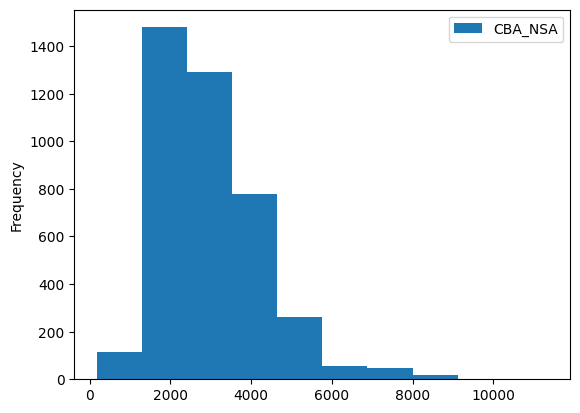

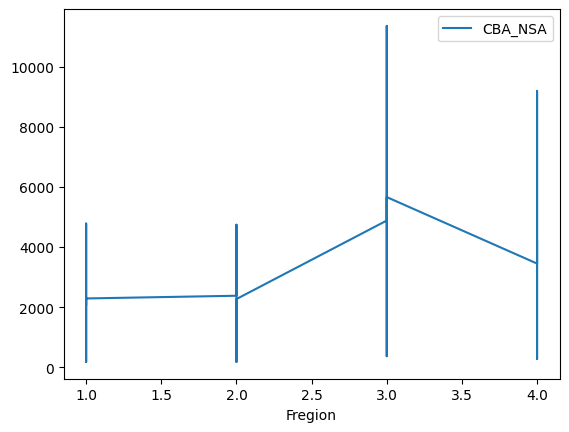

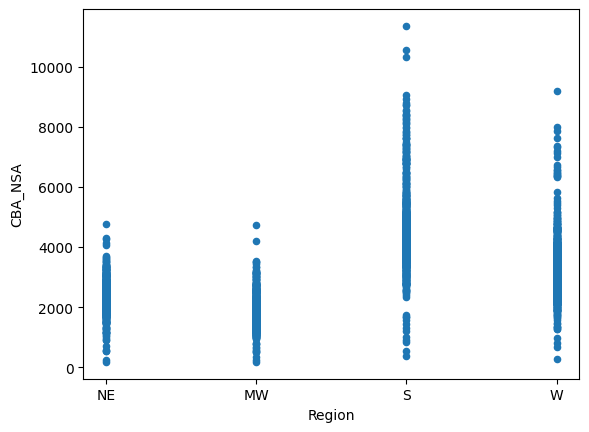

In [4]:
df.plot(kind='hist',x='Fregion',y='CBA_NSA') #Histogram plot to Show Corporate Business Applications based on Region
df.plot(kind='line',x='Fregion',y='CBA_NSA') #Line plot to show Corporate Business Applications based on Region
df.plot(kind='scatter',x='Region',y='CBA_NSA') #Scatter plot of Region grouped Corporate Business License Applications

# Data Understanding
## CRISP-DM Step: Data Understanding
### Using correlation to identify patterns and alignments in the data.

In [5]:
#Correlation Matrix to show metrics in relevance of the Corporate Business License Applications
corr_matrix = df.corr(numeric_only=True) 
corr_matrix["CBA_NSA"].sort_values(ascending=False)

CBA_NSA       1.000000
WBA_NSA       0.888277
HBA_NSA       0.844444
BA_NSA        0.620116
Fregion       0.450375
YY_CBA_NSA    0.148149
YY_HBA_NSA    0.100446
YY_BA_NSA     0.083063
YY_WBA_NSA    0.069355
Year         -0.114767
Week         -0.202407
Name: CBA_NSA, dtype: float64

In [6]:
#plotting the Corporate Business Licenses against the other variables aligning to the correlation matrix to identify trends.
from pandas.plotting import scatter_matrix
features = ["CBA_NSA","BA_NSA","Fregion","Year","WBA_NSA", "YY_BA_NSA","YY_CBA_NSA"]

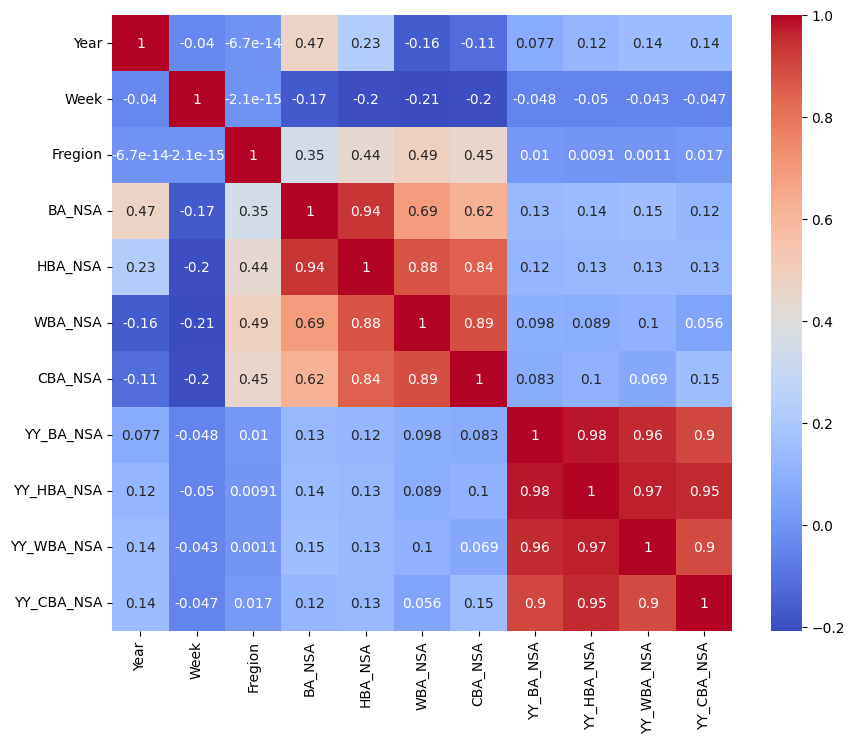

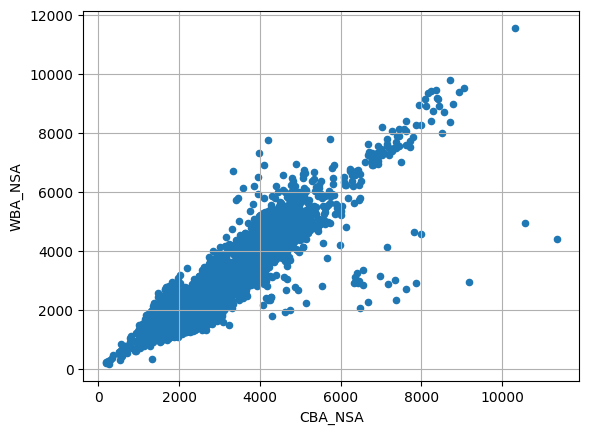

In [7]:
import seaborn as sns
#heatmap chart to identify closest potential correlation values
mp.pyplot.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
mp.pyplot.show()
#Scatter Plot showing the relationship between Corporate Business and Wage Businesses
df.plot(kind="scatter",x="CBA_NSA",y="WBA_NSA", grid=True)
mp.pyplot.show()

# Data Cleaning
## CRISP-DM Step: Data Preparation
### Cleaning the data to increase the fidelity of the outcome and to reduce potential outliers or skewing of the model.

In [8]:
#isolating data from non-quantitative inputs
data_df = df.drop(columns=['Region'])
data_df = data_df.dropna()
df_details(data_df)

Description of DataFrame: 
              Year         Week     Fregion        BA_NSA       HBA_NSA  \
count  3832.000000  3832.000000  3832.00000   3832.000000   3832.000000   
mean   2015.718163    26.155532     2.50000  16827.620042   6573.870042   
std       5.322676    15.036919     1.11818  10330.707128   3240.086328   
min    2007.000000     1.000000     1.00000    670.000000    330.000000   
25%    2011.000000    13.000000     1.75000   9890.000000   4250.000000   
50%    2016.000000    26.000000     2.50000  13490.000000   5400.000000   
75%    2020.000000    39.000000     3.25000  20300.000000   8392.500000   
max    2025.000000    52.000000     4.00000  65300.000000  21990.000000   

            WBA_NSA       CBA_NSA    YY_BA_NSA   YY_HBA_NSA   YY_WBA_NSA  \
count   3832.000000   3832.000000  3832.000000  3832.000000  3832.000000   
mean    2701.631002   2899.457203     6.370506     3.404061    -0.311114   
std     1295.423133   1234.104284    35.713121    33.516515    30.558

In [9]:
#setting the isolated test data sets, setting Commercial business applications
X, y= data_df, data_df['CBA_NSA']
print(X)
print(y)

      Year  Week  Fregion  BA_NSA  HBA_NSA  WBA_NSA  CBA_NSA  YY_BA_NSA  \
52    2007     1        1    7120     4060     2320     2440       5.33   
53    2007     2        1    3040     1830     1080     1150     -51.59   
54    2007     3        1   13610     7980     4560     4780      21.63   
55    2007     4        1    8870     5040     2760     3000       0.57   
56    2007     5        1   10130     5700     3090     3360      -5.42   
...    ...   ...      ...     ...      ...      ...      ...        ...   
4043  2025    18        4   27520     9200     2880     3880       5.28   
4044  2025    19        4   28500    11540     2910     6330       6.50   
4045  2025    20        4   29040    12760     2720     7620      20.25   
4046  2025    21        4   26130     9860     2690     4940       5.83   
4047  2025    22        4   22310     8480     2330     4210       3.82   

      YY_HBA_NSA  YY_WBA_NSA  YY_CBA_NSA  
52          8.56        2.20       16.75  
53        -51

# Modleing the Data
## CRISP-DM Step: Modeling
### Inputting the prepared data into a model for training with the goal of getting a reliable output.

In [10]:
from sklearn.model_selection import train_test_split
#Create the train test split of data for the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
from sklearn import linear_model
#Train the linear regression model on the train / test split
slr = linear_model.LinearRegression()
slr.fit(X_train, y_train)

LinearRegression()

# Accuracy and Testing
## CRISP-DM Step: Evaluation
### Using metrics to judge the models accuracy and utility in alignment with the initial purpose in mind.

In [11]:
from sklearn.metrics import root_mean_squared_error
#retrieve the results of the linear regression model.
lm_predict = slr.predict(X_test)
lm_r2 = slr.score(X_test, y_test)
lm_rmse = root_mean_squared_error(y_test,lm_predict)


In [14]:
#Results print out
print(X_test)
print(lm_predict) #predicted dataset
print(y_test) #test dataset
print("lm_r2:",lm_r2)
print("lm_rmse:",lm_rmse)


      Year  Week  Fregion  BA_NSA  HBA_NSA  WBA_NSA  CBA_NSA  YY_BA_NSA  \
1095  2007    32        2    9140     5140     3210     2670       6.78   
2852  2021    47        3   31230     9910     3510     3370     -18.52   
1149  2008    34        2    8400     3890     2030     1940       4.09   
2143  2008    16        3   22180    10420     4930     5480       4.52   
3966  2023    45        4   22510     7610     2610     3420       3.11   
...    ...   ...      ...     ...      ...      ...      ...        ...   
3655  2017    46        4   13110     5170     2240     2510       7.37   
773   2020    44        1   14250     4920     1590     2410      34.05   
2628  2017    31        3   25880     9370     3570     3660       9.48   
191   2009    35        1    7830     3750     1610     2150      -2.61   
102   2007    51        1    8200     4060     1900     2350       3.27   

      YY_HBA_NSA  YY_WBA_NSA  YY_CBA_NSA  
1095        7.76        3.22        6.37  
2852      -20

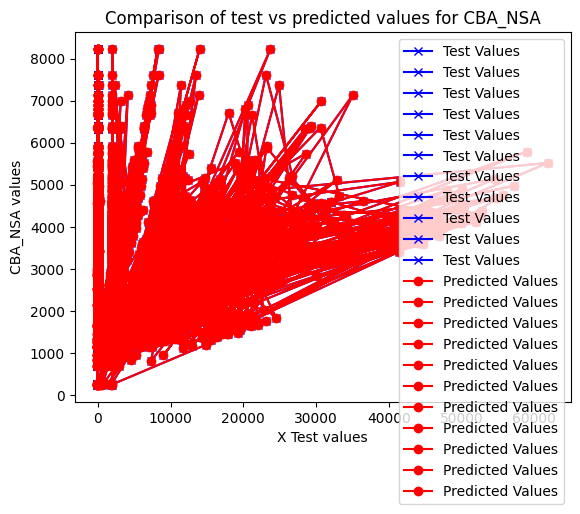

In [17]:
import matplotlib.pyplot as plt

plt.plot(X_test, y_test, label='Test Values', color='blue', marker='x')
plt.plot(X_test, lm_predict, label='Predicted Values', color='red', marker='o')

plt.xlabel('X Test values')
plt.ylabel('CBA_NSA values')
plt.title('Comparison of test vs predicted values for CBA_NSA')
plt.legend()

plt.show()